**Script de Exploración para el reto de predicción Atmira Cajamar.**

Realizado por el equipo: **Los Forecasters**

*   Eduardo Hugues Gudiño
*   Gustavo Adolfo Martínez Pérez
*   Manuel Meniño Magán


*Realizado con Google Colab*

In [ ]:
import requests
import io
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import seaborn as sns
import statistics as stats
from google.colab import files
from google.colab import drive
import datetime
from datetime import datetime, timezone, timedelta
import time
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error
import sklearn.metrics as metrics
from pandas.plotting import register_matplotlib_converters
import math
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss

In [ ]:
from itertools import cycle
pd.set_option('max_columns', 50)
plt.style.use('bmh')
color_pal = plt.rcParams['axes.prop_cycle'].by_key()['color']
color_cycle = cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])

In [ ]:
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
!cp '/gdrive/My Drive/Modelar_Estimar_Limpio_SinRelleno.csv' Modelar_Limpio.csv

In [ ]:
!ls -la | grep .csv

-rw------- 1 root root 126117692 Mar 16 17:48 Modelar_Limpio.csv


In [ ]:
modelar_estimar = pd.read_csv('Modelar_Limpio.csv', sep=',', index_col=0)

/usr/local/lib/python3.7/dist-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [ ]:
modelar_estimar.head()

,fecha,dia_semana,id,visitas,categoria_uno,categoria_dos,estado,precio,dia_atipico,campaña,antiguedad,unidades_vendidas
5,2015-06-06,5,21972,1,C,75,No Rotura,5.84,0,0,5241,3.0
6,2015-06-07,6,21972,1,C,75,No Rotura,5.84,0,0,5241,0.0
7,2015-06-08,0,21972,1,C,75,No Rotura,5.84,0,0,5241,3.0
8,2015-06-09,1,21972,1,C,75,No Rotura,5.84,0,0,5241,0.0
9,2015-06-10,2,21972,0,C,75,No Rotura,5.84,0,0,5241,0.0


In [ ]:
modelar_estimar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1982469 entries, 5 to 2242656
Data columns (total 12 columns):
 #   Column             Dtype  
---  ------             -----  
 0   fecha              object 
 1   dia_semana         int64  
 2   id                 int64  
 3   visitas            int64  
 4   categoria_uno      object 
 5   categoria_dos      int64  
 6   estado             object 
 7   precio             float64
 8   dia_atipico        int64  
 9   campaña            int64  
 10  antiguedad         int64  
 11  unidades_vendidas  float64
dtypes: float64(2), int64(7), object(3)
memory usage: 196.6+ MB


In [ ]:
modelar_estimar.shape

(1982469, 12)

In [ ]:
estimar=modelar_estimar[modelar_estimar['fecha']>'2016-09-30']

In [ ]:
modelar=modelar_estimar[modelar_estimar['fecha']<='2016-09-30']

In [ ]:
estimar.shape

(212841, 12)

#Análisis estadístico del dataset modelar

In [ ]:
modelar.shape

(1769628, 12)

In [ ]:
modelar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1769628 entries, 5 to 2242567
Data columns (total 12 columns):
 #   Column             Dtype  
---  ------             -----  
 0   fecha              object 
 1   dia_semana         int64  
 2   id                 int64  
 3   visitas            int64  
 4   categoria_uno      object 
 5   categoria_dos      int64  
 6   estado             object 
 7   precio             float64
 8   dia_atipico        int64  
 9   campaña            int64  
 10  antiguedad         int64  
 11  unidades_vendidas  float64
dtypes: float64(2), int64(7), object(3)
memory usage: 175.5+ MB


In [ ]:
modelar.unidades_vendidas= modelar.unidades_vendidas.astype("int64")

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


Mostramos los histogramas de las variables numéricas

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f517caf69d0>,
      dtype=object)

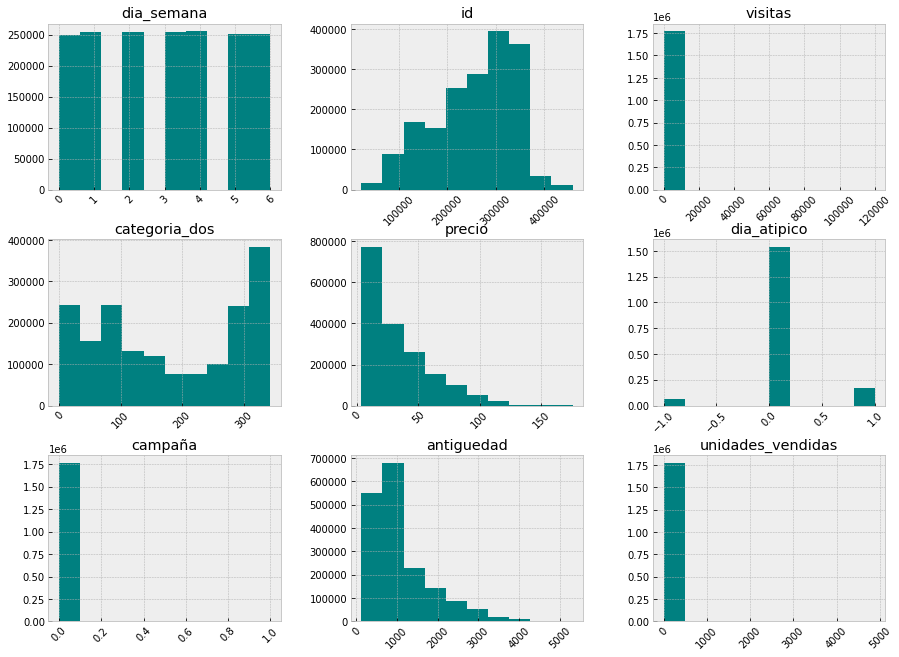

In [ ]:
modelar.hist(figsize=(15,11), color="#008080", xrot=45) 

Nos centramos en la variable de salida unidades_vendidas, realizando varios visionados distintos de su histograma para una mejor visualización,
ya que la mayoría de las veces toma el valor 0 o valores próximos a este. Además del histograma normal, se exploran otras posibilidades como acortar los valores del eje X, dividir los valores entre 3 (ya que todos los posibles valores de la variable son multiplos de este número), poner escala logarítmica, y visionar la funcion de distribución de la variable.

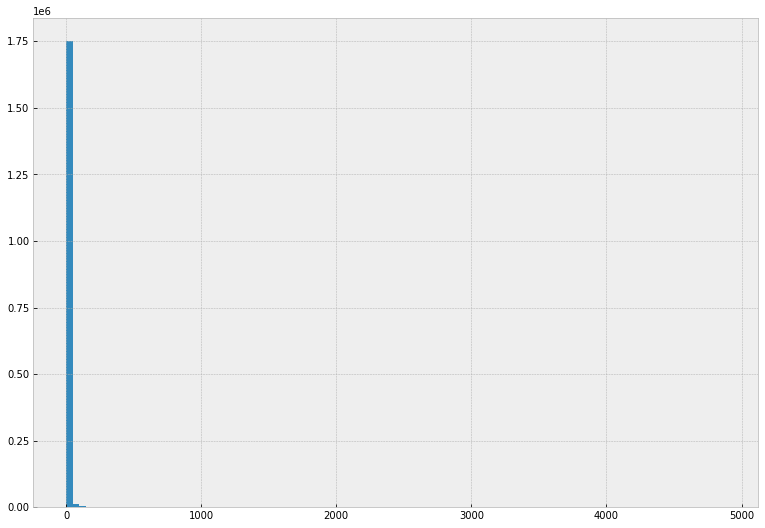

In [ ]:
modelar['unidades_vendidas'].hist(bins=100, figsize=(13,9))

In [ ]:
max(modelar.unidades_vendidas)

4881

Text(0.5, 1.0, 'Histograma de Unidades_vendidas')

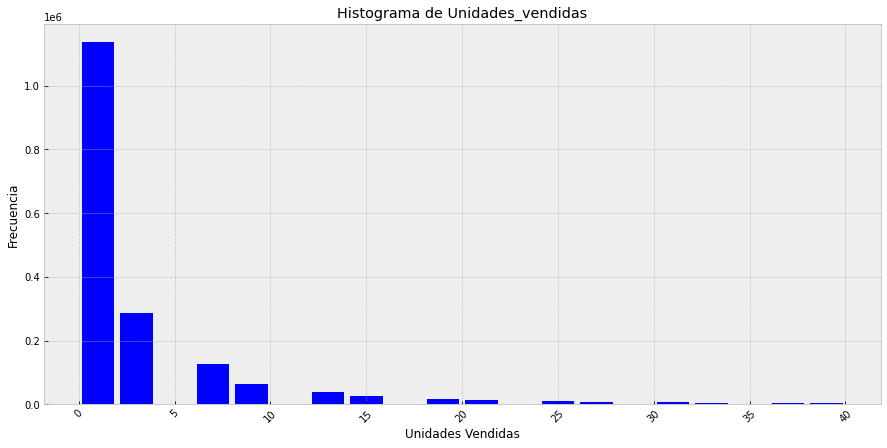

In [ ]:
modelar.unidades_vendidas.hist(figsize=(15,7), color="blue", xrot=45, bins=20,range=(0,40),rwidth=0.85) 
plt.ylabel('Frecuencia')
plt.xlabel('Unidades Vendidas')
plt.title('Histograma de Unidades_vendidas')

Text(0.5, 1.0, 'Histograma de Unidades_vendidas')

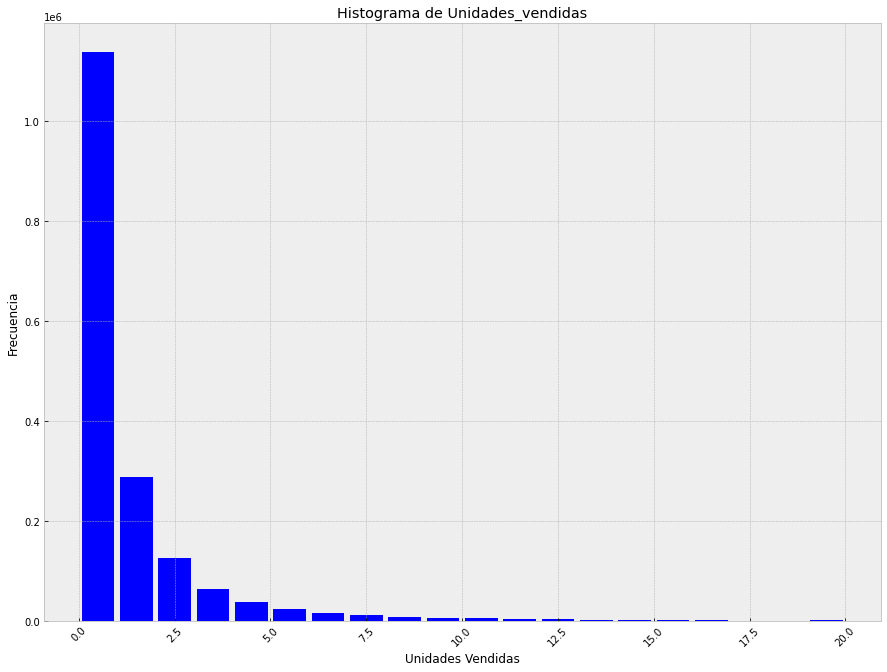

In [ ]:
(modelar.unidades_vendidas/3).hist(figsize=(15,11), color="blue", xrot=45, bins=20,range=(0,20),rwidth=0.85) 
plt.ylabel('Frecuencia')
plt.xlabel('Unidades Vendidas')
plt.title('Histograma de Unidades_vendidas')

Text(0.5, 1.0, 'distribución de la variable de salida')

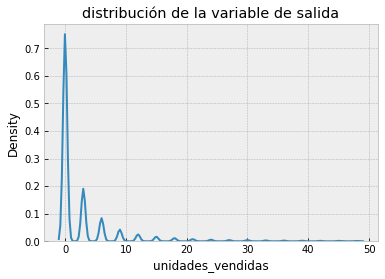

In [ ]:
sns.kdeplot(modelar.unidades_vendidas[modelar.unidades_vendidas<50])
plt.title('distribución de la variable de salida')

Text(0.5, 1.0, 'Decrecimiento logaritmico de Unidades_vendidas')

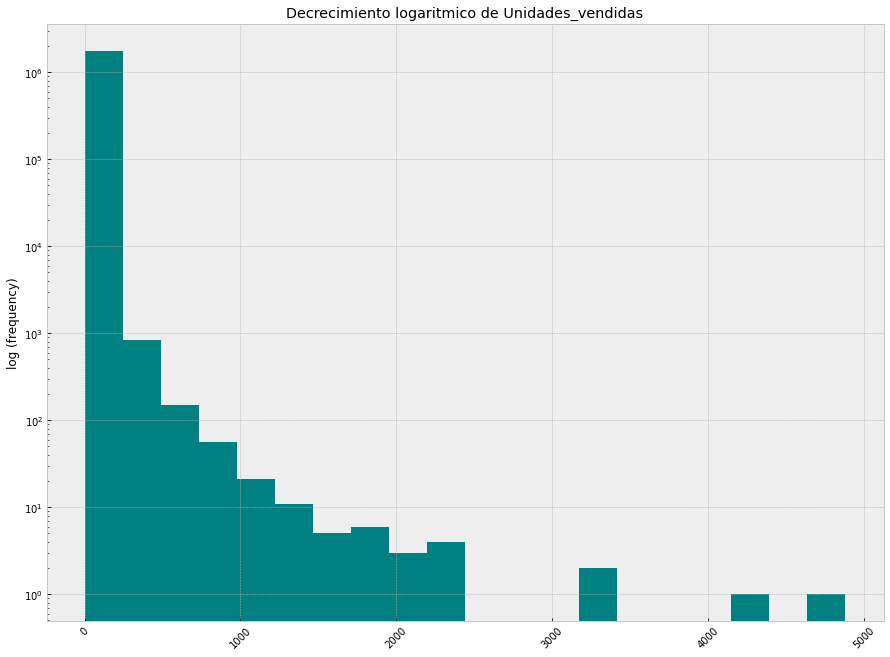

In [ ]:
modelar.unidades_vendidas.hist(figsize=(15,11), color="#008080", xrot=45, bins=20,log=True)
plt.ylabel('log (frequency)')
plt.title('Decrecimiento logaritmico de Unidades_vendidas')

Estudiamos relaciones importantes de las variables respecto a la variable objetivo, con tablas y visualizaciones de las mismas en diagramas de barras

In [ ]:
100*(pd.crosstab(index=modelar['dia_atipico'],columns=modelar['campaña'],values=modelar.unidades_vendidas, aggfunc='mean',normalize=True,margins=True))

campaña,0,1,All
dia_atipico,,,
-1,2.329880,0.000000,16.718955
0,3.620674,33.291601,26.025120
1,5.432972,55.324873,57.255924
All,6.418741,93.581259,100.000000


In [ ]:
100*(pd.crosstab(index=modelar['dia_atipico'],columns=modelar['campaña'],normalize=True))

campaña,0,1
dia_atipico,,
-1,3.571090,0.000000
0,86.677313,0.017744
1,9.237139,0.496715


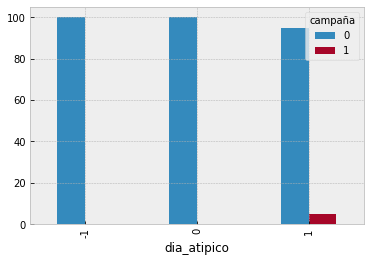

In [ ]:
plot = pd.crosstab(index=modelar['dia_atipico'],columns=modelar['campaña']).apply(lambda r: r/r.sum() *100,axis=1).plot(kind='bar')

Text(0.5, 1.0, 'Numero medio de ventas según dia_atipico y campaña')

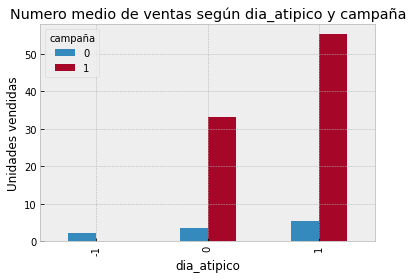

In [ ]:
plot=pd.crosstab(index=modelar['dia_atipico'],columns=modelar['campaña'],values=modelar.unidades_vendidas, aggfunc='mean').plot(kind='bar')
plt.ylabel('Unidades vendidas')
plt.title('Numero medio de ventas según dia_atipico y campaña')

Destacamos la alta influencia de que los artículos se encuentren en campaña a la hora de aumentar mucho sus ventas, y todo ello a pesar de que su precio medio también aumenta cuando se da dicha circunstacia. El número de visitas también aumenta mucho cuando se producen campañas.

In [ ]:
modelar.pivot_table(['unidades_vendidas', 'precio', 'visitas'], ['campaña'], aggfunc='mean')

,precio,unidades_vendidas,visitas
campaña,,,
0,33.726665,3.734532,130.064118
1,42.355739,54.447166,1346.630602


Text(0.5, 1.0, 'Ventas, visitas y precios medios según campaña')

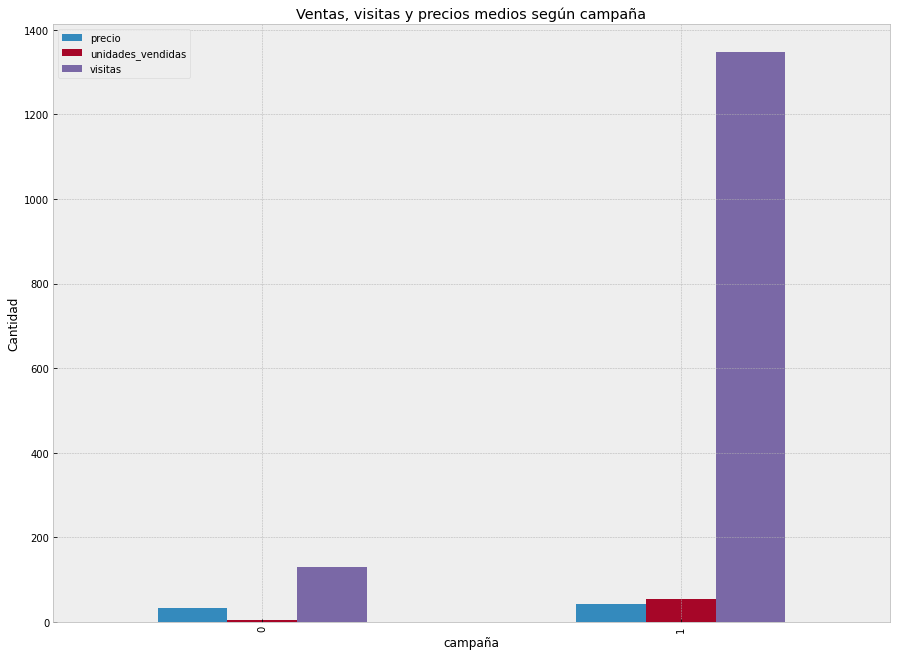

In [ ]:
plot=modelar.pivot_table(['unidades_vendidas', 'precio', 'visitas'], ['campaña'], aggfunc='mean').plot(kind='bar',figsize=(15,11))
plt.ylabel('Cantidad')
plt.title('Ventas, visitas y precios medios según campaña')

Text(0.5, 1.0, 'Ventas y precios medios según campaña')

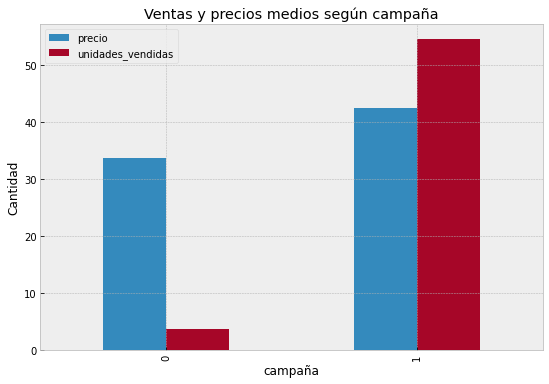

In [ ]:
plot=modelar.pivot_table(['unidades_vendidas', 'precio'], ['campaña'], aggfunc='mean').plot(kind='bar',figsize=(9,6))
plt.ylabel('Cantidad')
plt.title('Ventas y precios medios según campaña')

In [ ]:
modelar.pivot_table(['unidades_vendidas', 'visitas','precio'], ['dia_atipico'], aggfunc='mean')

,precio,unidades_vendidas,visitas
dia_atipico,,,
-1,34.061262,2.324852,111.253501
0,33.773093,3.618919,137.013109
1,33.646456,7.961713,139.372255


Vemos también en qué cantidad se reparten los distintos tipos de categorias uno y dos de los artículos, y la posible influencia que puede tener en las ventas que se trate de una clase u otra.

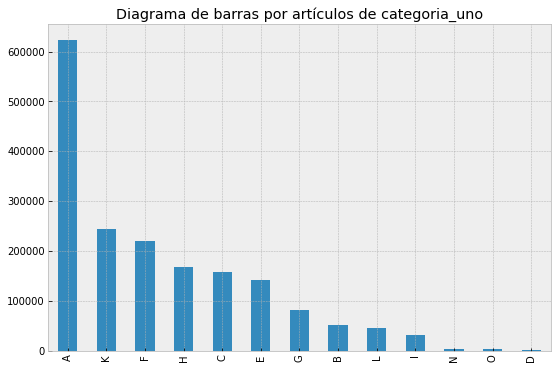

In [ ]:
plot= modelar['categoria_uno'].value_counts().plot(kind='bar',title='Diagrama de barras por artículos de categoria_uno',figsize=(9,6))

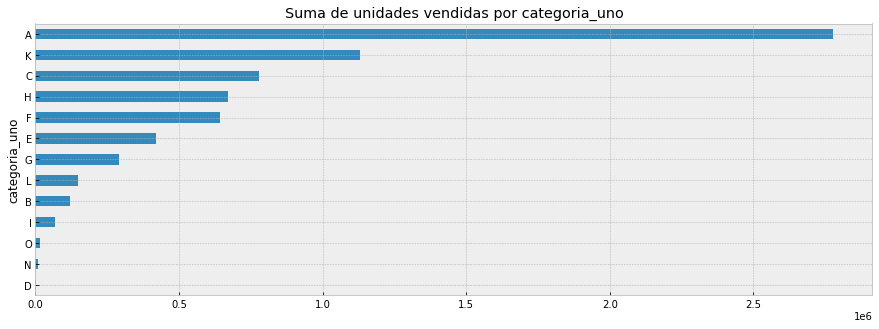

In [ ]:
modelar.groupby('categoria_uno').sum()['unidades_vendidas'] \
    .sort_values() \
    .plot(kind='barh', figsize=(15, 5), title='Suma de unidades vendidas por categoria_uno')
plt.show()

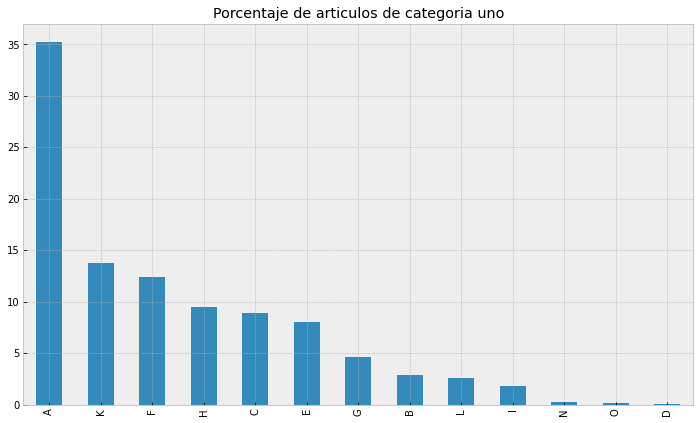

In [ ]:
plot2 = (100 * modelar['categoria_uno'].value_counts() / len(modelar['categoria_uno'])).plot(kind='bar', title='Porcentaje de articulos de categoria uno',figsize=(12,7))

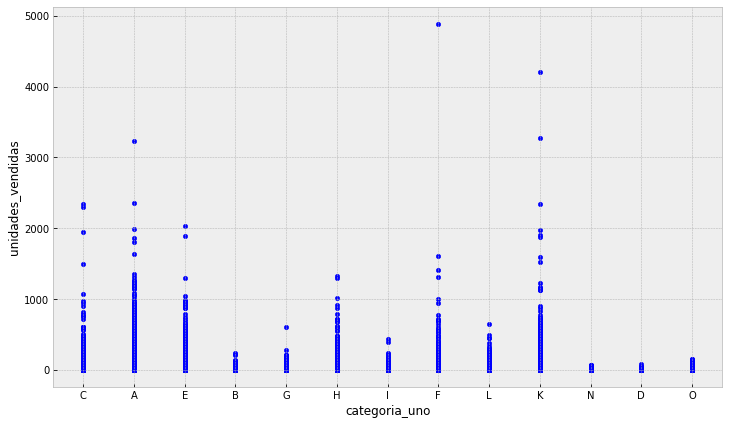

In [ ]:
myplot= modelar.plot("categoria_uno","unidades_vendidas",kind="scatter",figsize=(12,7))
plt.show()

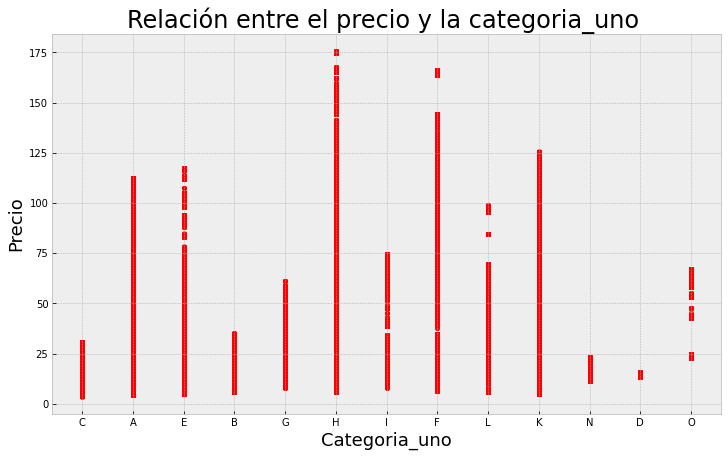

In [ ]:
modelar.plot(kind='scatter', x='categoria_uno',y='precio', color='red',alpha=0.5, figsize=(12,7))
plt.title('Relación entre el precio y la categoria_uno ', size=24)
plt.xlabel('Categoria_uno', size=18)
plt.ylabel('Precio', size=18);


In [ ]:
modelar.groupby('categoria_uno').mean()['unidades_vendidas'] \
    .sort_values(ascending=False).head(10)

categoria_uno
O    6.610979
C    4.944031
K    4.633690
A    4.453280
H    3.996388
G    3.581898
L    3.272309
E    2.959993
F    2.924655
B    2.351426
Name: unidades_vendidas, dtype: float64

In [ ]:
modelar.groupby('categoria_dos').mean()['unidades_vendidas'] \
    .sort_values(ascending=False).head(10)

categoria_dos
238    48.624711
224    23.039014
122    14.333370
43     10.174149
157     8.896424
73      8.855022
197     8.683845
298     8.507316
181     8.254620
192     8.156270
Name: unidades_vendidas, dtype: float64

Se puede observar como, si bien la diferencia entre las ventas medias de las distintas clases de categoría uno no es muy grande, sí lo es entre algunas de las clases de categoría dos, cuyas ventas en media oscilan más, siendo esta una variable con más peso a la hora de determinar la variable de salida.

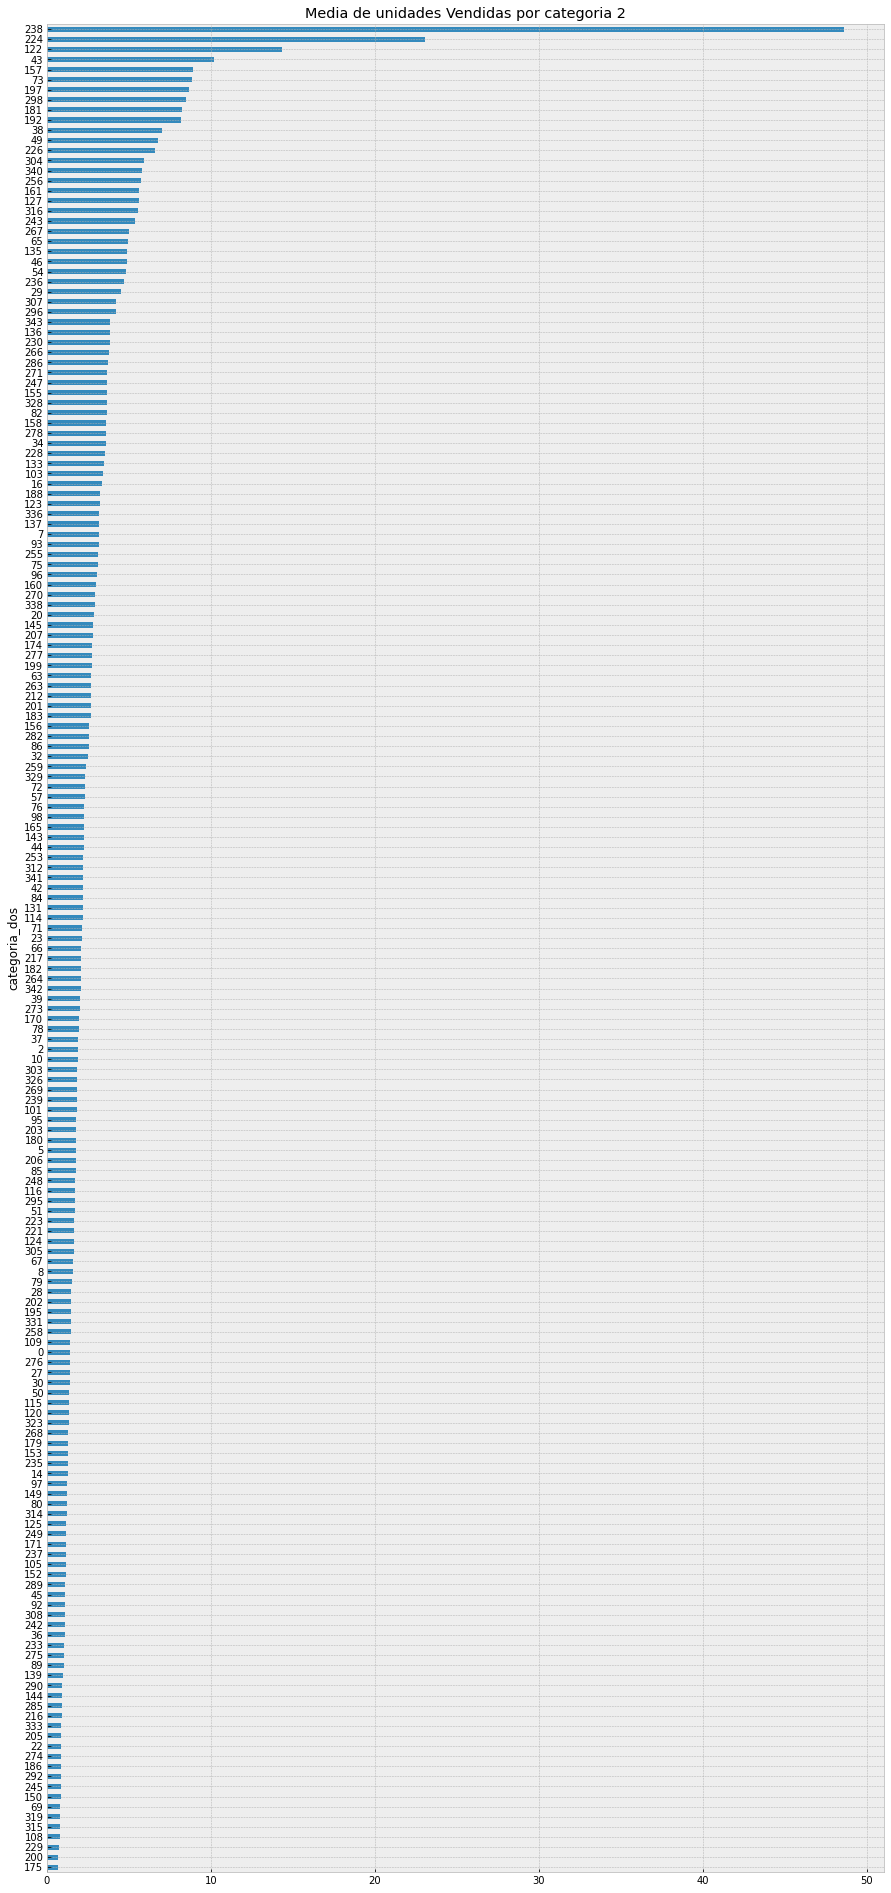

In [ ]:
modelar.groupby('categoria_dos').mean()['unidades_vendidas'] \
    .sort_values() \
    .plot(kind='barh', figsize=(15, 34), title='Media de unidades Vendidas por categoria 2')
plt.show()

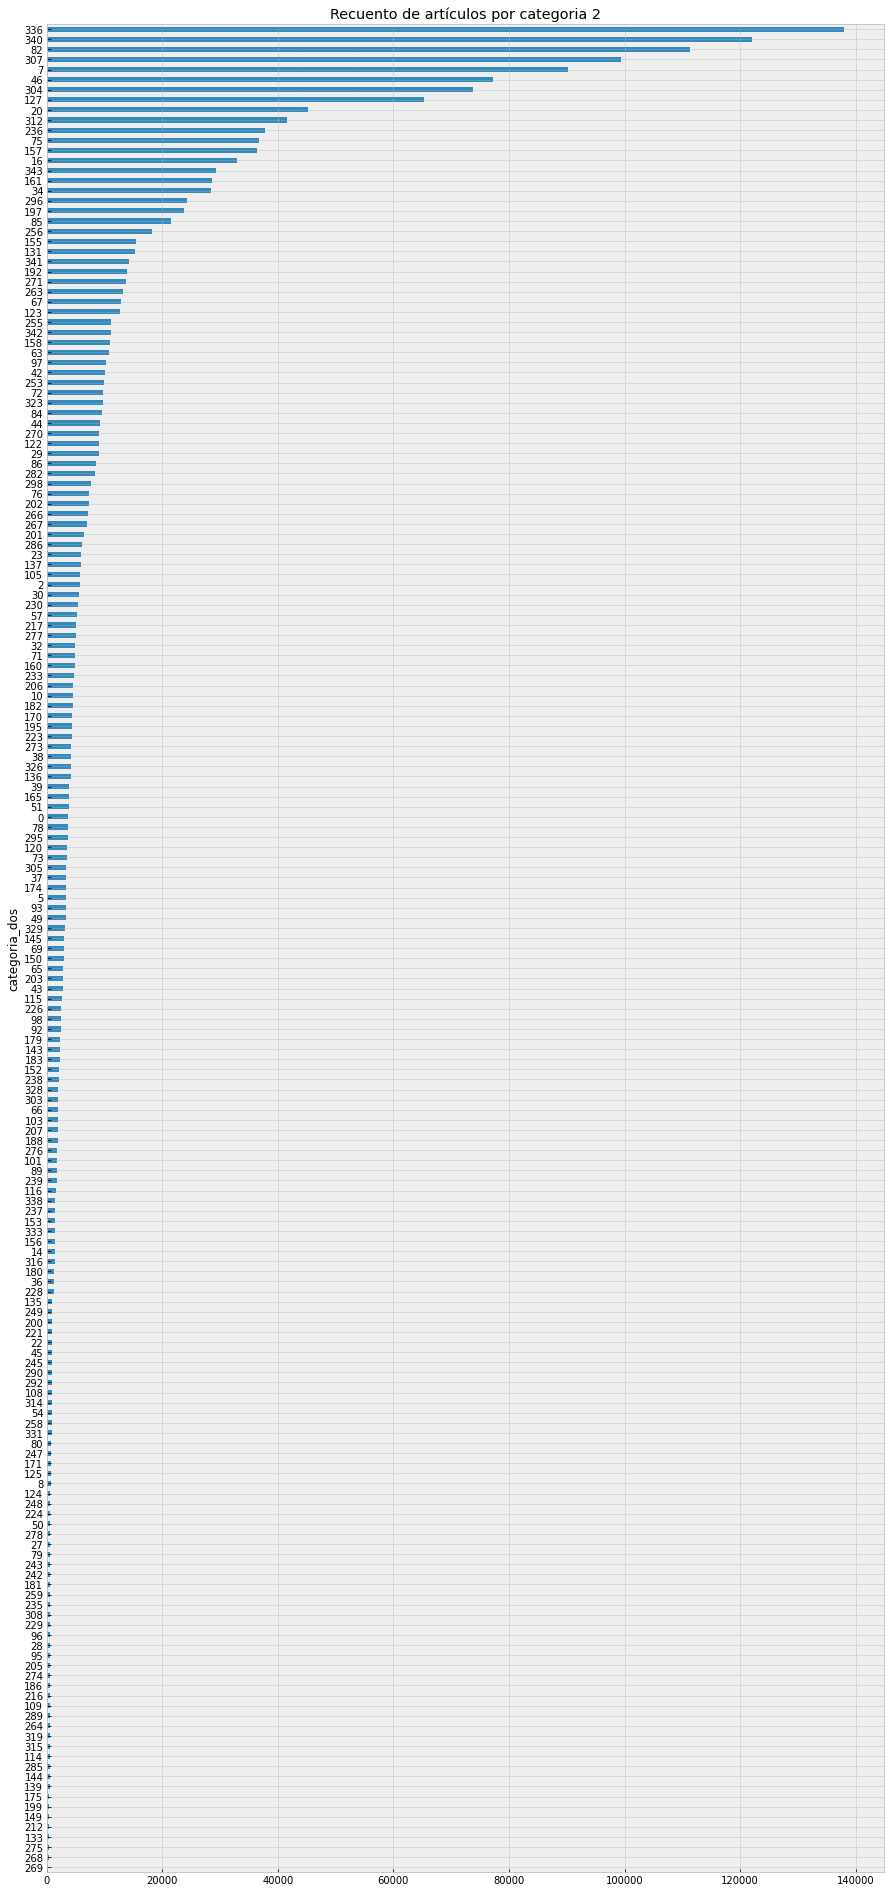

In [ ]:
modelar.groupby('categoria_dos').count()['id'] \
    .sort_values() \
    .plot(kind='barh', figsize=(15, 34), title='Recuento de artículos por categoria 2')
plt.show()

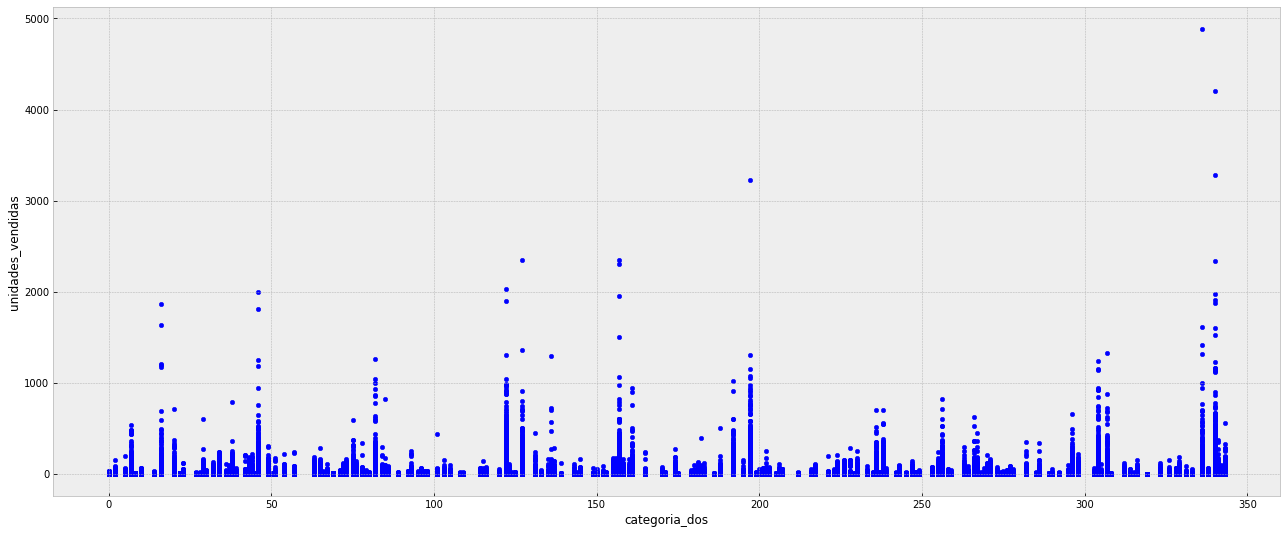

In [ ]:
myplot= modelar.plot("categoria_dos","unidades_vendidas",kind="scatter",figsize=(22,9))
plt.show()

También analizamos las ventas por cada día de la semana y vemos que hay algunos en los que en media se vende más que en otros y viceversa.

Text(0.5, 1.0, 'Numero medio de ventas según dia de semana')

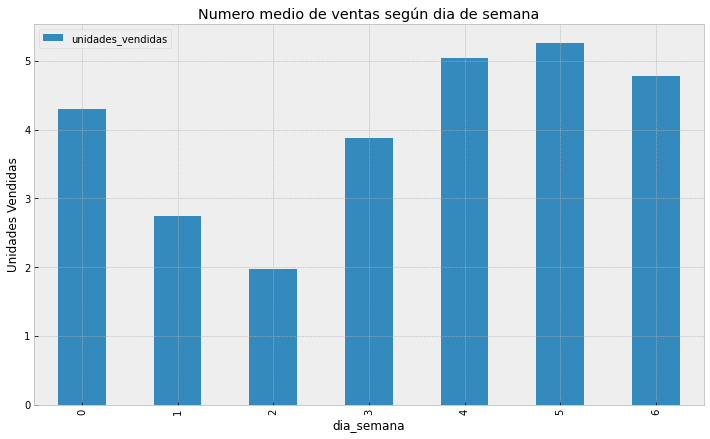

In [ ]:
plot=modelar.pivot_table(['unidades_vendidas'], ['dia_semana'], aggfunc='mean').plot(kind='bar',figsize=(12,7))
plt.ylabel('Unidades Vendidas')
plt.title('Numero medio de ventas según dia de semana')

Text(0.5, 1.0, 'Numero total de ventas según dia de semana')

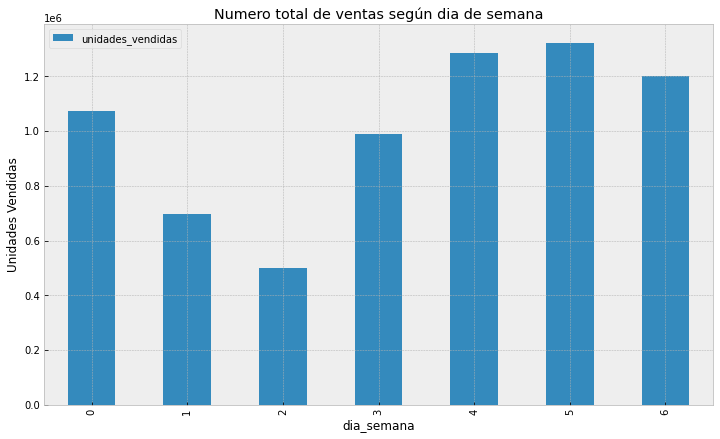

In [ ]:
plot=modelar.pivot_table(['unidades_vendidas'], ['dia_semana'], aggfunc='sum').plot(kind='bar',figsize=(12,7))
plt.ylabel('Unidades Vendidas')
plt.title('Numero total de ventas según dia de semana')

También podemos observar a continuación el núemro de artículos únicos que hay y la gran diferencia entre el número de ventas de unos artículos y de otros. 

In [ ]:
len(modelar.id.unique())

4168

In [ ]:
modelar.groupby('id').sum()['unidades_vendidas'] \
    .sort_values(ascending=False).head(10)

id
156486    61614
171840    59403
327526    57570
86096     50901
120188    45579
171826    41649
319780    40350
105220    38754
428042    29661
113428    26880
Name: unidades_vendidas, dtype: int64

In [ ]:
modelar.groupby('id').sum()['unidades_vendidas'] \
    .sort_values(ascending=True).head(10)

id
404242    300
353014    300
295520    300
271766    300
379060    303
323660    303
437904    303
387618    303
101022    306
409398    306
Name: unidades_vendidas, dtype: int64

Se muestra la evolución en el tiempo de las ventas del artículo del cual se vendieron más unidades en total. 

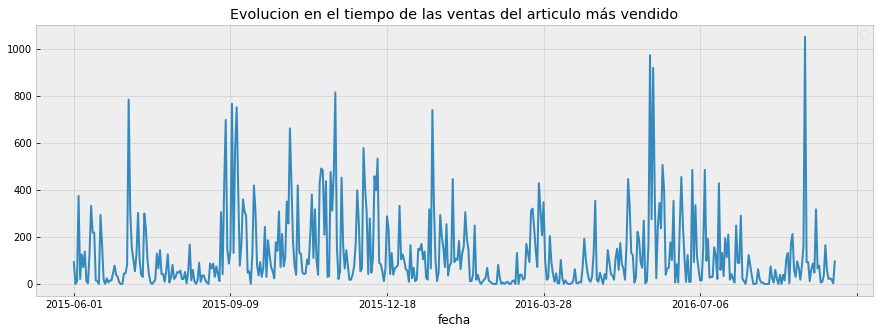

In [ ]:
modelar.loc[modelar['id'] == 156486] \
    .set_index('fecha')['unidades_vendidas'] \
    .T \
    .plot(figsize=(15, 5),
          title='Evolucion en el tiempo de las ventas del articulo más vendido',
          color=next(color_cycle))
plt.legend('')
plt.show()

Y algunos estadísticos más sobre sobre los artículos según su id.

In [ ]:
modelar.groupby(['id'])['unidades_vendidas'].agg([np.count_nonzero,np.mean,np.std, 
                                            np.min, np.max,np.sum])

,count_nonzero,mean,std,amin,amax,sum
id,,,,,,
21972,194,4.605809,9.423409,0,66,2220
23910,241,3.733060,6.765821,0,75,1818
24306,94,12.819876,89.316066,0,1806,6192
27144,134,2.651452,8.206716,0,120,1278
27504,160,2.076446,4.357752,0,48,1005
...,...,...,...,...,...,...
456982,36,23.230769,17.366728,0,66,906
457416,34,9.083333,5.577378,0,24,327
457422,14,13.222222,20.283251,0,84,357


Observamos las correlaciones entre las variables.

In [ ]:
modelar.corr()

,dia_semana,id,visitas,categoria_dos,precio,dia_atipico,campaña,antiguedad,unidades_vendidas
dia_semana,1.000000,0.000265,0.019034,0.000026,0.000218,0.001678,-0.009193,-0.000271,0.037360
id,0.000265,1.000000,0.136753,0.200989,0.397412,-0.009340,0.024838,-0.942545,-0.002695
visitas,0.019034,0.136753,1.000000,0.106934,0.146921,0.005714,0.149992,-0.103509,0.390724
categoria_dos,0.000026,0.200989,0.106934,1.000000,0.508493,-0.001772,0.019949,-0.167104,0.017421
precio,0.000218,0.397412,0.146921,0.508493,1.000000,-0.002406,0.023746,-0.356992,-0.032930
dia_atipico,0.001678,-0.009340,0.005714,-0.001772,-0.002406,1.000000,0.180796,0.006540,0.067667
campaña,-0.009193,0.024838,0.149992,0.019949,0.023746,0.180796,1.000000,-0.021947,0.198012
antiguedad,-0.000271,-0.942545,-0.103509,-0.167104,-0.356992,0.006540,-0.021947,1.000000,0.016971
unidades_vendidas,0.037360,-0.002695,0.390724,0.017421,-0.032930,0.067667,0.198012,0.016971,1.000000


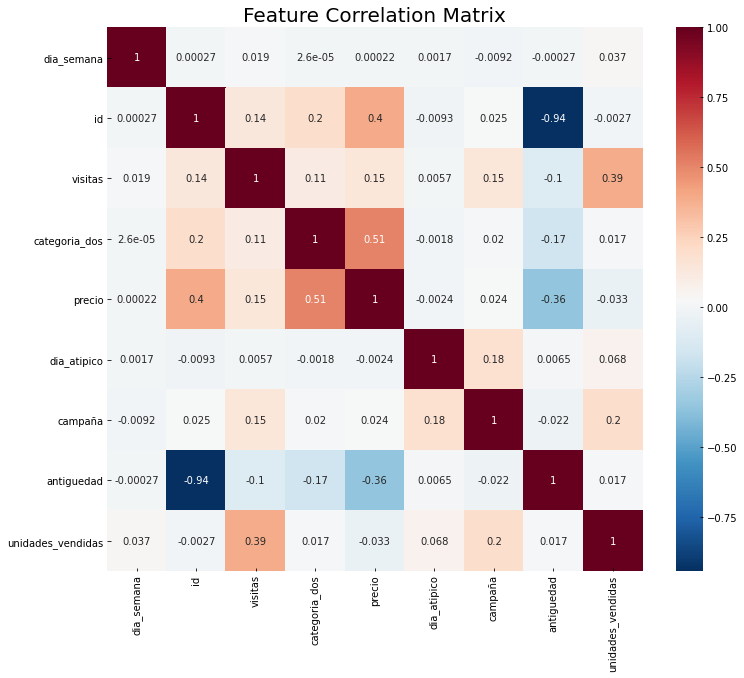

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(modelar.corr(), annot=True, cmap='RdBu_r')
plt.title("Feature Correlation Matrix",fontsize=20)
plt.show()


Y algunos boxplots interesantes en función de si hay campaña o no.

Text(0.5, 1.0, 'Unidades Vendidas por dia de semana vs dia_semana')

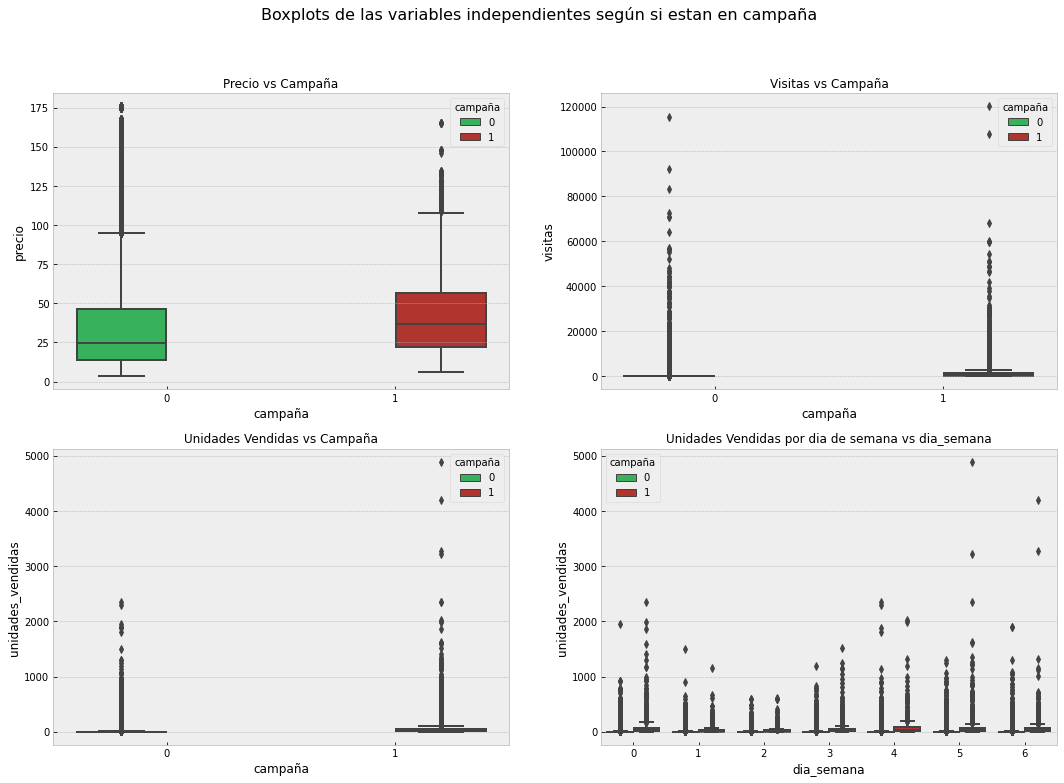

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle('Boxplots de las variables independientes según si estan en campaña', fontsize=16)

sns.boxplot(ax=axes[0,0], x=modelar['campaña'], y=modelar['precio'], hue=modelar['campaña'], palette=('#23C552','#C52219'))
axes[0,0].set_title("Precio vs Campaña", fontsize=12)

sns.boxplot(ax=axes[0,1], x=modelar['campaña'], y=modelar['visitas'], hue=modelar['campaña'], palette=('#23C552','#C52219'))
axes[0,1].set_title("Visitas vs Campaña", fontsize=12)

sns.boxplot(ax=axes[1,0], x=modelar['campaña'], y=modelar['unidades_vendidas'], hue=modelar['campaña'], palette=('#23C552','#C52219'))
axes[1,0].set_title("Unidades Vendidas vs Campaña", fontsize=12)

sns.boxplot(ax=axes[1,1], x=modelar['dia_semana'], y=modelar['unidades_vendidas'], hue=modelar['campaña'], palette=('#23C552','#C52219'))
axes[1,1].set_title("Unidades Vendidas por dia de semana vs dia_semana", fontsize=12)


Y diagramas de dispersión de las ventas respecto al precio y a las visitas.

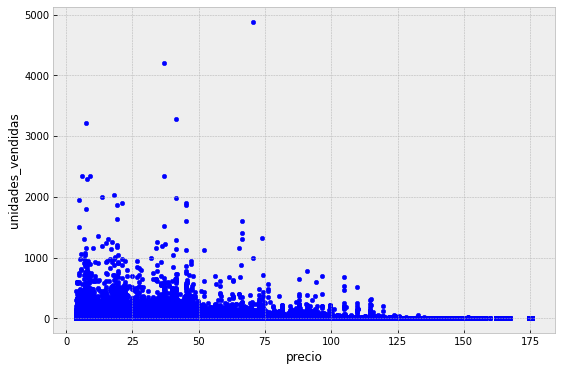

In [ ]:
myplot= modelar.plot("precio","unidades_vendidas",kind="scatter",figsize=(9,6))
plt.show()

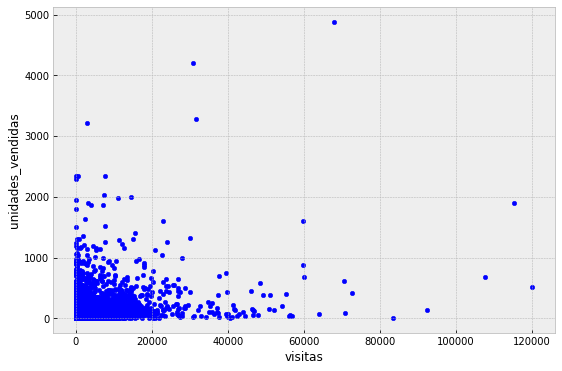

In [ ]:
myplot= modelar.plot("visitas","unidades_vendidas",kind="scatter",figsize=(9,6))
plt.show()

#Análisis del dataset estimar

Realizamos algunos de los estudios hechos para el archivo de modelar también para el dataset de estimar, para observar por encima si las variables se distribuyen de una manera similar.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f517b2c06d0>,
      dtype=object)

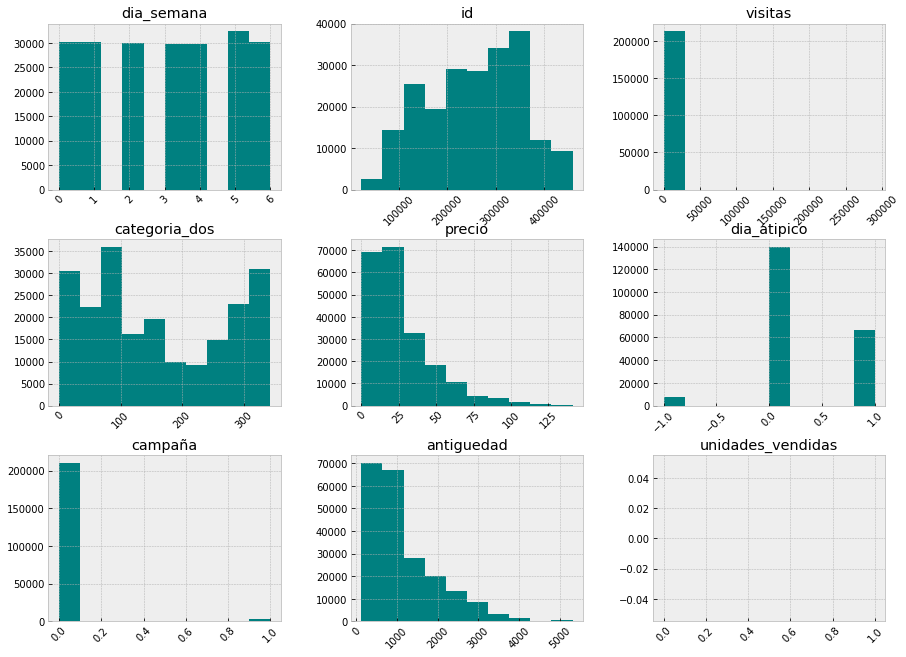

In [ ]:
estimar.hist(figsize=(15,11), color="#008080", xrot=45) 

Quizá destacar que existe un porcentaje de dias atipicos=1 y de campañas mayor que en el archivo de modelar

In [ ]:
100*(pd.crosstab(index=estimar['dia_atipico'],columns=estimar['campaña'],normalize=True))

campaña,0,1
dia_atipico,,
-1,3.379988,0.000000
0,65.403282,0.053091
1,29.769640,1.393998


In [ ]:
estimar.pivot_table(['precio', 'visitas'], ['campaña'], aggfunc='mean')

,precio,visitas
campaña,,
0,26.814808,250.610194
1,34.656708,4069.961039


In [ ]:
estimar.pivot_table(['visitas','precio'], ['dia_atipico'], aggfunc='mean')

,precio,visitas
dia_atipico,,
-1,27.446414,224.557270
0,27.231726,240.629675
1,26.234749,451.751346


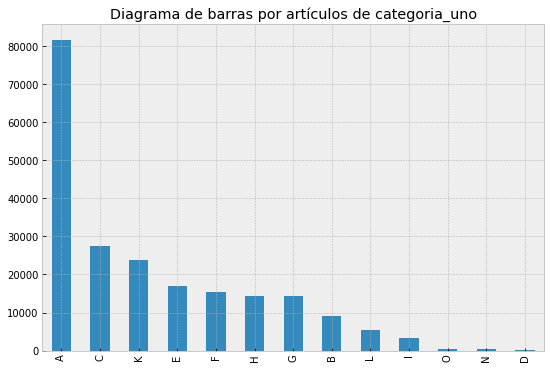

In [ ]:
plot= estimar['categoria_uno'].value_counts().plot(kind='bar',title='Diagrama de barras por artículos de categoria_uno',figsize=(9,6))

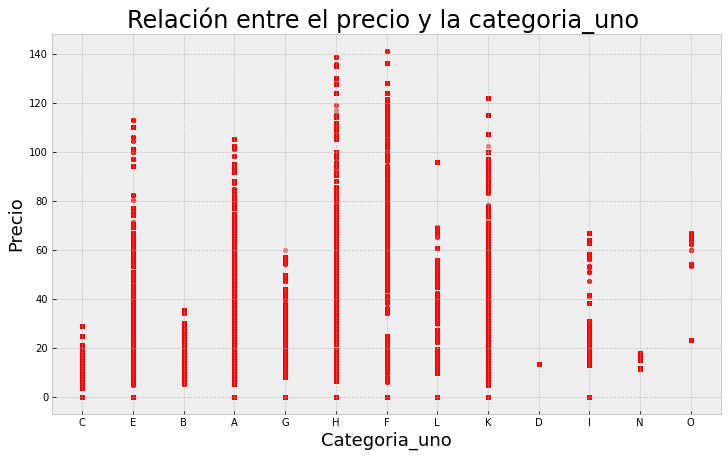

In [ ]:
estimar.plot(kind='scatter', x='categoria_uno',y='precio', color='red',alpha=0.5, figsize=(12,7))
plt.title('Relación entre el precio y la categoria_uno ', size=24)
plt.xlabel('Categoria_uno', size=18)
plt.ylabel('Precio', size=18);

Tanto el reparto del porcentaje de articulos de categoría_uno como de categoria_dos, es un poco diferente al que teníamos en el archivo de modelar. Algunas clases de artículos salen menos y otras más que con respecto al citado archivo.

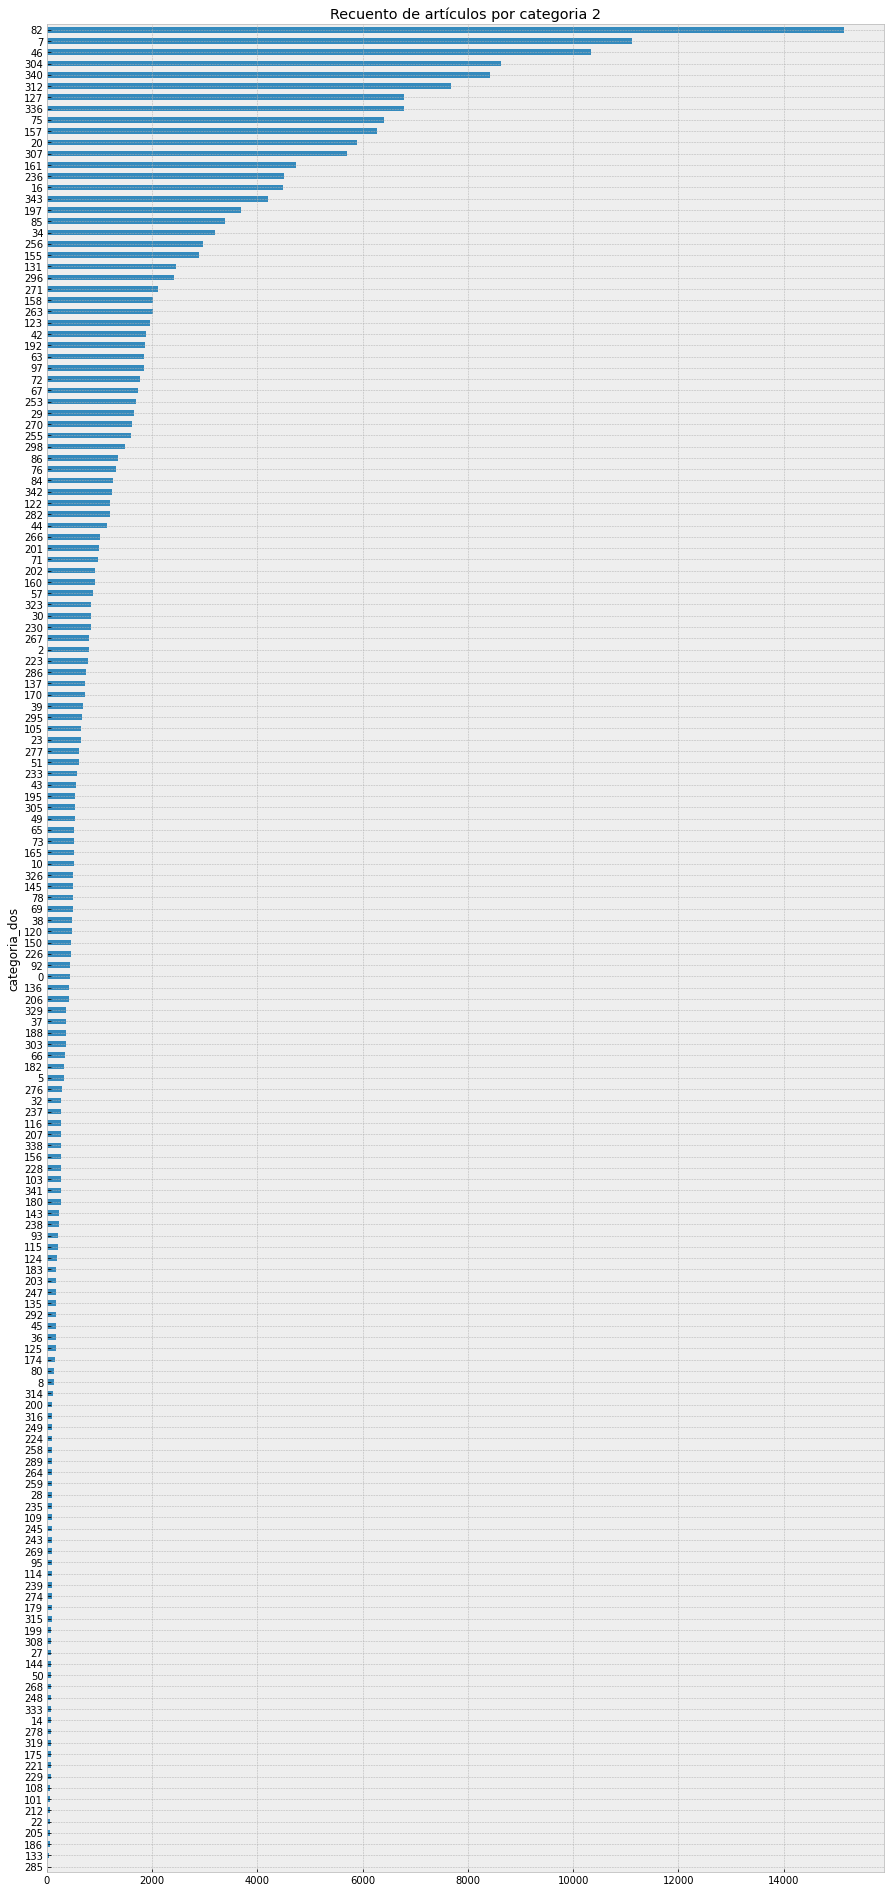

In [ ]:
estimar.groupby('categoria_dos').count()['id'] \
    .sort_values() \
    .plot(kind='barh', figsize=(15, 34), title='Recuento de artículos por categoria 2')
plt.show()

También vemos que no todos los artículos que teníamos en el archivo modelar están en el archivo estimar. Por lo tanto sólo habrá que predecir ventas para 2736 artículos de los 4168 que teníamos antes. El reparto entre ellos también será distinto en el archivo estimar.

In [ ]:
len(estimar.id.unique())

2736

In [ ]:
estimar.groupby('id').count()['fecha'] \
    .sort_values(ascending=False).head(10)

id
163470    92
196098    92
192676    92
192404    92
318994    92
186414    92
319478    92
185970    92
319720    92
319780    92
Name: fecha, dtype: int64

Text(0.5, 1.0, 'Visitas vs Campaña')

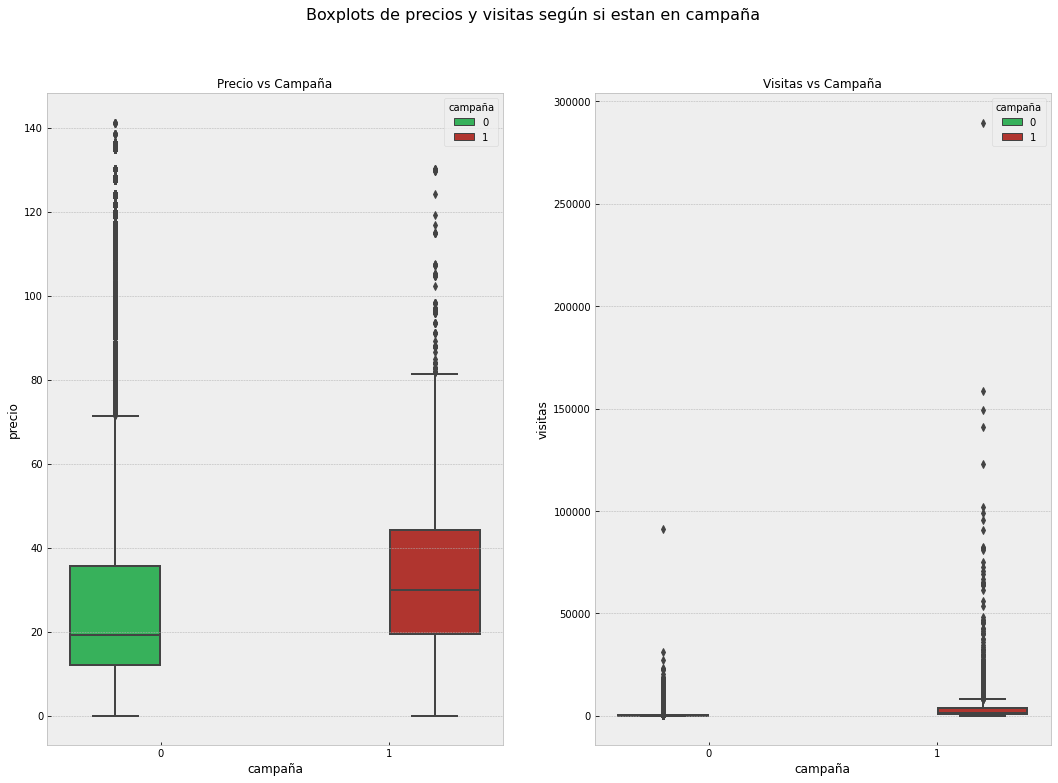

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(18, 12))
fig.suptitle('Boxplots de precios y visitas según si estan en campaña', fontsize=16)

sns.boxplot(ax=axes[0], x=estimar['campaña'], y=estimar['precio'], hue=estimar['campaña'], palette=('#23C552','#C52219'))
axes[0].set_title("Precio vs Campaña", fontsize=12)

sns.boxplot(ax=axes[1], x=estimar['campaña'], y=estimar['visitas'], hue=estimar['campaña'], palette=('#23C552','#C52219'))
axes[1].set_title("Visitas vs Campaña", fontsize=12)

In [ ]:
En cuanto al resto de relaciones observadas en el archivo estimar es más o menos similar al que habíamos visto ya antes en el de modelar.

#Feature Engineering (probados pero no implementados en solución final)

Variable objetivo unidades_vendidas retrasada (lag) y diferencia (diff). Se prueba en validación que el resultado con estas variables 

###Añade Lags: Unidades vendidas (*NO*)

In [ ]:
#Introduce lags
#lags1 = [1,2,3,6,12,24,36]
#lags2 = [1,2,3,4,5,6,7,10,14,21]
#lags3 = [1,2,7,14,21]
#lags4 = [1,7]
#lags5 = [1]
#lags6 = [1,2]
#lags7 = [1,2,3,5,7]
#lags = lags3
#for lag in lags:
#    modelar2['unidades_lag_'+str(lag)] = modelar2.groupby(['id'],as_index=False)['unidades_vendidas'].shift(lag).astype(np.float32)
#modelar2.columns

Index(['fecha', 'id', 'visitas', 'categoria_uno', 'categoria_dos', 'estado',
       'precio', 'dia_atipico', 'campaña', 'antiguedad', 'unidades_vendidas',
       'mes', 'semana', 'dia_semana', 'unidades_lag_1', 'unidades_lag_2',
       'unidades_lag_7', 'unidades_lag_14', 'unidades_lag_21'],
      dtype='object')

##Añade Lags: Visitas (*NO Ejecutar*)

In [ ]:
#Introduce lags
#lags1 = [1,2,3,6,12,24,36]
#lags2 = [1,2,3,4,5,6,7,10,14,21]
#lags3 = [1,2,7,14,21]
#lags4 = [1,7]
#lags5 = [1,2,7]
#lags6 = [1,2]
#lags7 = [1]
#lags = lags6
#for lag in lags:
#    modelar2['visitas_lag_'+str(lag)] = modelar2.groupby(['id'],as_index=False)['visitas'].shift(lag).astype(np.float32)
#modelar2.columns

##Añade Diffs: Unidades vendidas (* NO Ejecutar*)

In [ ]:
#Introduce Diff
#diffs1 = [1]
#diffs2 = [1,2]
#diffs3 = [2]
#diffs = diffs2
#for diff in diffs:
#    modelar2['unidades_diff_'+str(diff)] = modelar2.groupby(['id'],as_index=False)['unidades_vendidas'].diff(diff).astype(np.float32)
#modelar2.columns

##Añade Diffs: Precio (**Ejecutar**)

In [ ]:
#Introduce Diff
diffs1 = [1,2,3,4,5,6,7,10,14,21]
diffs2 = [5,10,15,20,25,30]
diffs3 = [10,20,30,40,50,60]
diffs4 = [7,14,21,28,35,42,49]
diffs5 = [1,21]
diffs = diffs5
for diff in diffs:
    modelar2['precio_diff_'+str(diff)] = modelar2.groupby(['id'],as_index=False)['precio'].diff(diff).astype(np.float32)
modelar2.columns

Index(['fecha', 'id', 'visitas', 'categoria_uno', 'categoria_dos', 'estado',
       'precio', 'dia_atipico', 'campaña', 'antiguedad', 'unidades_vendidas',
       'mes', 'semana', 'dia_semana', 'precio_diff_1', 'precio_diff_21'],
      dtype='object')

##Mean Encoding: Unidades vendidas (*NO Ejecutar*)

In [ ]:
#modelar2['id_unidades_avg'] = modelar2.groupby('id')['unidades_vendidas'].transform('mean').astype(np.float16)
#modelar2['id_unidades_std'] = modelar2.groupby('id')['unidades_vendidas'].transform('std').astype(np.float16)
#modelar2['cat1_unidades_avg'] = modelar2.groupby('categoria_uno')['unidades_vendidas'].transform('mean').astype(np.float16)
#modelar2['cat1_unidades_std'] = modelar2.groupby('categoria_uno')['unidades_vendidas'].transform('std').astype(np.float16)
#modelar2['cat2_unidades_avg'] = modelar2.groupby('categoria_dos')['unidades_vendidas'].transform('mean').astype(np.float16)
#modelar2['cat2_unidades_std'] = modelar2.groupby('categoria_dos')['unidades_vendidas'].transform('std').astype(np.float16)
#modelar2['estado_unidades_avg'] = modelar2.groupby('estado')['unidades_vendidas'].transform('mean').astype(np.float16)
#modelar2['estado_unidades_std'] = modelar2.groupby('estado')['unidades_vendidas'].transform('std').astype(np.float16)
#modelar2['atipico_unidades_avg'] = modelar2.groupby('dia_atipico')['unidades_vendidas'].transform('mean').astype(np.float16)
#modelar2['atipico_unidades_std'] = modelar2.groupby('dia_atipico')['unidades_vendidas'].transform('std').astype(np.float16)
#modelar2['campaña_unidades_avg'] = modelar2.groupby('campaña')['unidades_vendidas'].transform('mean').astype(np.float16)
#modelar2['campaña_unidades_std'] = modelar2.groupby('campaña')['unidades_vendidas'].transform('std').astype(np.float16)
#modelar2['atip_camp_unidades_avg'] = modelar2.groupby(['dia_atipico','campaña'])['unidades_vendidas'].transform('mean').astype(np.float16)
#modelar2['atip_camp_unidades_std'] = modelar2.groupby(['dia_atipico','campaña'])['unidades_vendidas'].transform('std').astype(np.float16)
#modelar2.columns

##Labelencoding (**Ejecutar**)

In [ ]:
#drop_columns=['fecha']#, 'categoria_dos', 'antiguedad','id']
#modelar2 = modelar.drop(columns=drop_columns)
labelencoder = LabelEncoder()
modelar2['categoria_uno'] = labelencoder.fit_transform(modelar2['categoria_uno'])
modelar2['estado'] = labelencoder.fit_transform(modelar2['estado'])
modelar2

,fecha,id,visitas,categoria_uno,categoria_dos,estado,precio,dia_atipico,campaña,antiguedad,unidades_vendidas,mes,semana,dia_semana,precio_diff_1,precio_diff_21
0,2015-06-01,21972,0,2,75,0,NaN,0,0,5241,0,6,23,0,NaN,NaN
1,2015-06-02,21972,0,2,75,0,NaN,0,0,5241,0,6,23,1,NaN,NaN
2,2015-06-03,21972,1,2,75,0,NaN,0,0,5241,0,6,23,2,NaN,NaN
3,2015-06-04,21972,1,2,75,0,NaN,0,0,5241,0,6,23,3,NaN,NaN
4,2015-06-05,21972,3,2,75,0,NaN,0,0,5241,0,6,23,4,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2033979,2016-09-26,458660,890,9,340,0,68.88,0,0,126,6,9,39,0,-1.97,-1.97
2033980,2016-09-27,458660,1375,9,340,0,68.49,0,0,126,10,9,39,1,-0.39,-2.36
2033981,2016-09-28,458660,1085,9,340,0,68.49,0,0,126,10,9,39,2,0.00,-2.36
2033982,2016-09-29,458660,1325,9,340,0,68.49,0,0,126,1,9,39,3,0.00,-2.36


In [ ]:
modelar2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2033984 entries, 0 to 2033983
Data columns (total 16 columns):
 #   Column             Dtype         
---  ------             -----         
 0   fecha              datetime64[ns]
 1   id                 int64         
 2   visitas            int64         
 3   categoria_uno      int64         
 4   categoria_dos      int64         
 5   estado             int64         
 6   precio             float64       
 7   dia_atipico        int64         
 8   campaña            int64         
 9   antiguedad         int64         
 10  unidades_vendidas  int64         
 11  mes                int64         
 12  semana             int64         
 13  dia_semana         int64         
 14  precio_diff_1      float32       
 15  precio_diff_21     float32       
dtypes: datetime64[ns](1), float32(2), float64(1), int64(12)
memory usage: 328.3 MB


In [ ]:
#estimar2 = estimar.drop(columns=drop_columns)
estimar2['categoria_uno'] = labelencoder.fit_transform(estimar2['categoria_uno'])
estimar2['estado'] = labelencoder.fit_transform(estimar2['estado'])
estimar2

,fecha,id,visitas,categoria_uno,categoria_dos,estado,precio,dia_atipico,campaña,antiguedad,mes,semana,dia_semana
0,2016-10-01,21972,5,2,75,0,5.84,0,0,5150,10,39,5
1,2016-10-02,21972,15,2,75,0,5.84,0,0,5150,10,39,6
2,2016-10-03,21972,5,2,75,0,5.84,0,0,5150,10,40,0
3,2016-10-04,21972,5,2,75,0,5.84,0,0,5150,10,40,1
4,2016-10-05,21972,0,2,75,0,5.84,0,0,5150,10,40,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
218258,2016-12-26,458660,1085,9,340,0,70.85,1,0,35,12,52,0
218259,2016-12-27,458660,965,9,340,0,70.85,1,0,35,12,52,1
218260,2016-12-28,458660,1005,9,340,0,70.85,1,0,35,12,52,2
218261,2016-12-29,458660,745,9,340,0,70.85,1,0,35,12,52,3
